Imagine que você precisa colocar uma cerca para separar dois grupos de pessoas em um campo. Você poderia colocar a cerca de várias maneiras, mas qual é a melhor?

O SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina que resolve exatamente esse problema. Ele não apenas encontra uma linha para separar os grupos, mas encontra a melhor linha possível, que tem a maior "margem" de segurança entre os dois grupos.

Neste script, vamos ver como o SVM encontra essa "melhor cerca" e quais são os pontos mais importantes para ele.

Passo 1: Criando os dados para o nosso problema.

Passo 2: Visualizando os dois grupos de pontos que queremos separar.


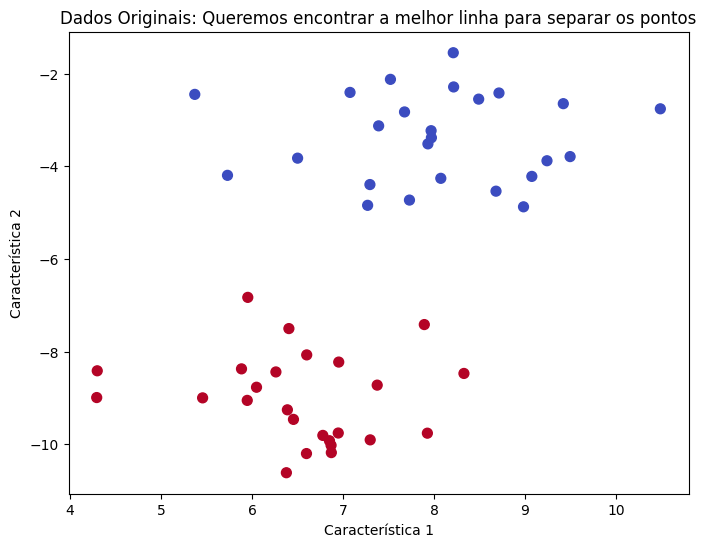


O nosso objetivo é traçar uma linha que separe o grupo vermelho do grupo azul.

Passo 3: Treinando o SVM para encontrar a melhor linha...

Passo 4: Visualizando a 'cerca' do SVM e os pontos mais importantes.


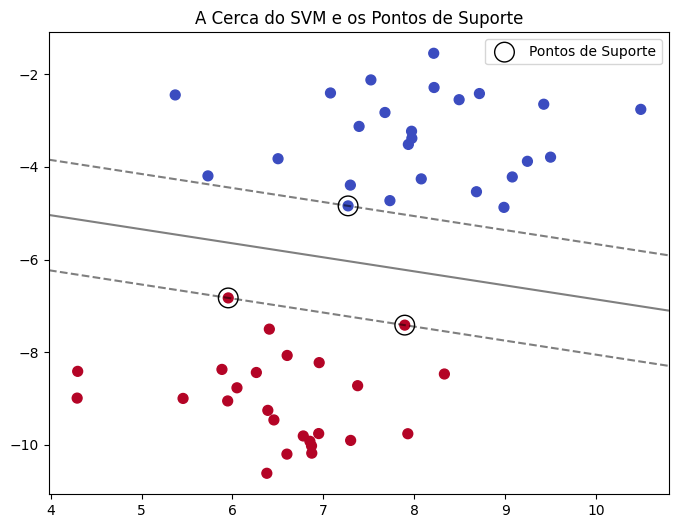


Note que o SVM desenhou uma linha que maximiza a distância para os pontos de suporte (os círculos).
Essa distância é a 'margem' do SVM, e a linha no meio é a melhor cerca para separar os grupos.
Apenas os pontos de suporte (círculos) são usados para definir a cerca.

Passo 5 (Bônus): O 'truque do kernel' para dados não-lineares.
--------------------------------------------------
E se os dados não puderem ser separados por uma linha reta?


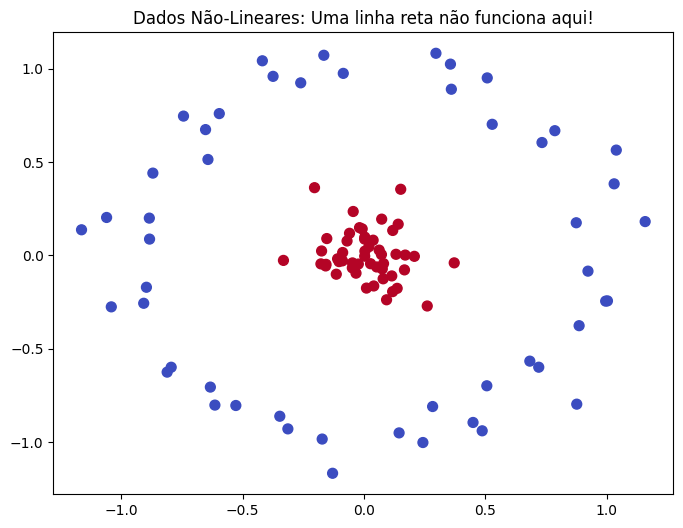

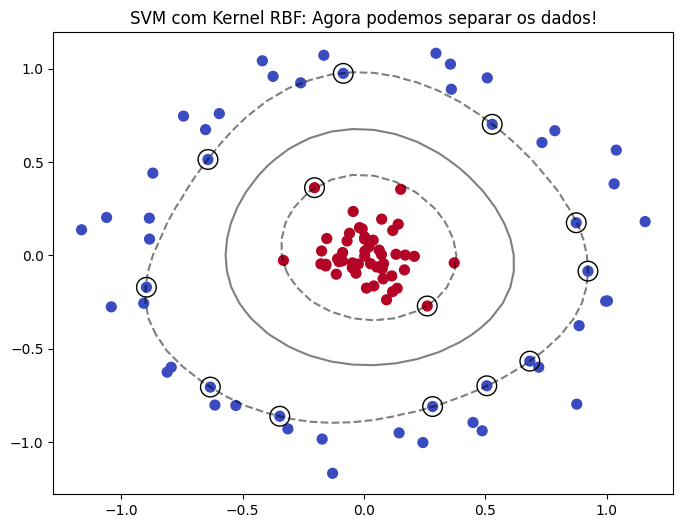


Com o 'truque do kernel', o SVM pode criar fronteiras de decisão complexas e curtas para resolver problemas mais difíceis.


In [1]:
# =================================================================
# 1. Configuração e Criação do Conjunto de Dados
# =================================================================

# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

print("Passo 1: Criando os dados para o nosso problema.")

# Gerando um conjunto de dados simples e separável em 2 grupos
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# =================================================================
# 2. Visualização dos Dados Originais
# =================================================================

print("\nPasso 2: Visualizando os dois grupos de pontos que queremos separar.")

# Plotando os dados para ver o problema
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.title("Dados Originais: Queremos encontrar a melhor linha para separar os pontos")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

print("\nO nosso objetivo é traçar uma linha que separe o grupo vermelho do grupo azul.")

# =================================================================
# 3. Treinando o SVM para Encontrar a Melhor Linha
# =================================================================

print("\nPasso 3: Treinando o SVM para encontrar a melhor linha...")

# Criando uma instância do SVM. Usamos 'linear' para dados que podem ser separados por uma linha reta.
clf = svm.SVC(kernel='linear', C=1000)
# O método 'fit' é onde o algoritmo aprende a melhor linha
clf.fit(X, y)

# =================================================================
# 4. Visualizando a Decisão do SVM
# =================================================================

print("\nPasso 4: Visualizando a 'cerca' do SVM e os pontos mais importantes.")

# Plotando os dados originais novamente
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

# === Visualizando a "Melhor Cerca" ===
# Para plotar a linha, criamos uma grade de pontos
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# A linha sólida é a "cerca" ou "hiperplano"
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# === Visualizando os "Pontos de Suporte" ===
# Os pontos de suporte são os dados mais próximos da cerca.
# Eles são os únicos pontos que importam para definir a melhor cerca.
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k', label='Pontos de Suporte')

plt.title("A Cerca do SVM e os Pontos de Suporte")
plt.legend()
plt.show()

print("\nNote que o SVM desenhou uma linha que maximiza a distância para os pontos de suporte (os círculos).")
print("Essa distância é a 'margem' do SVM, e a linha no meio é a melhor cerca para separar os grupos.")
print("Apenas os pontos de suporte (círculos) são usados para definir a cerca.")


# =================================================================
# 5. O truque para dados que não são uma linha (Bônus!)
# =================================================================

print("\nPasso 5 (Bônus): O 'truque do kernel' para dados não-lineares.")
print("-" * 50)
print("E se os dados não puderem ser separados por uma linha reta?")

# Criando um novo conjunto de dados que não pode ser separado por uma linha
from sklearn.datasets import make_circles
X_nonlin, y_nonlin = make_circles(n_samples=100, factor=.1, noise=.1, random_state=42)

# Plotando os dados não-lineares
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, s=50, cmap='coolwarm')
plt.title("Dados Não-Lineares: Uma linha reta não funciona aqui!")
plt.show()

# Agora, vamos usar um SVM com um 'kernel' diferente, chamado 'rbf'.
# Ele magicamente projeta os dados em um espaço de maior dimensão para encontrar uma divisão
# e depois traz a divisão de volta para 2D, resultando em uma fronteira curva.
clf_nonlin = svm.SVC(kernel='rbf', C=100)
clf_nonlin.fit(X_nonlin, y_nonlin)

# Plotando a nova fronteira de decisão
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, s=50, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_nonlin.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf_nonlin.support_vectors_[:, 0], clf_nonlin.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

plt.title("SVM com Kernel RBF: Agora podemos separar os dados!")
plt.show()

print("\nCom o 'truque do kernel', o SVM pode criar fronteiras de decisão complexas e curtas para resolver problemas mais difíceis.")